In [1]:
import cv2
from IPython import display
from PIL import Image

def cv2_imshow(a):
    """A replacement for cv2.imshow() for use in Jupyter notebooks.
    Args:
    a : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
      (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color
      image.
    """
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display.display(Image.fromarray(a))

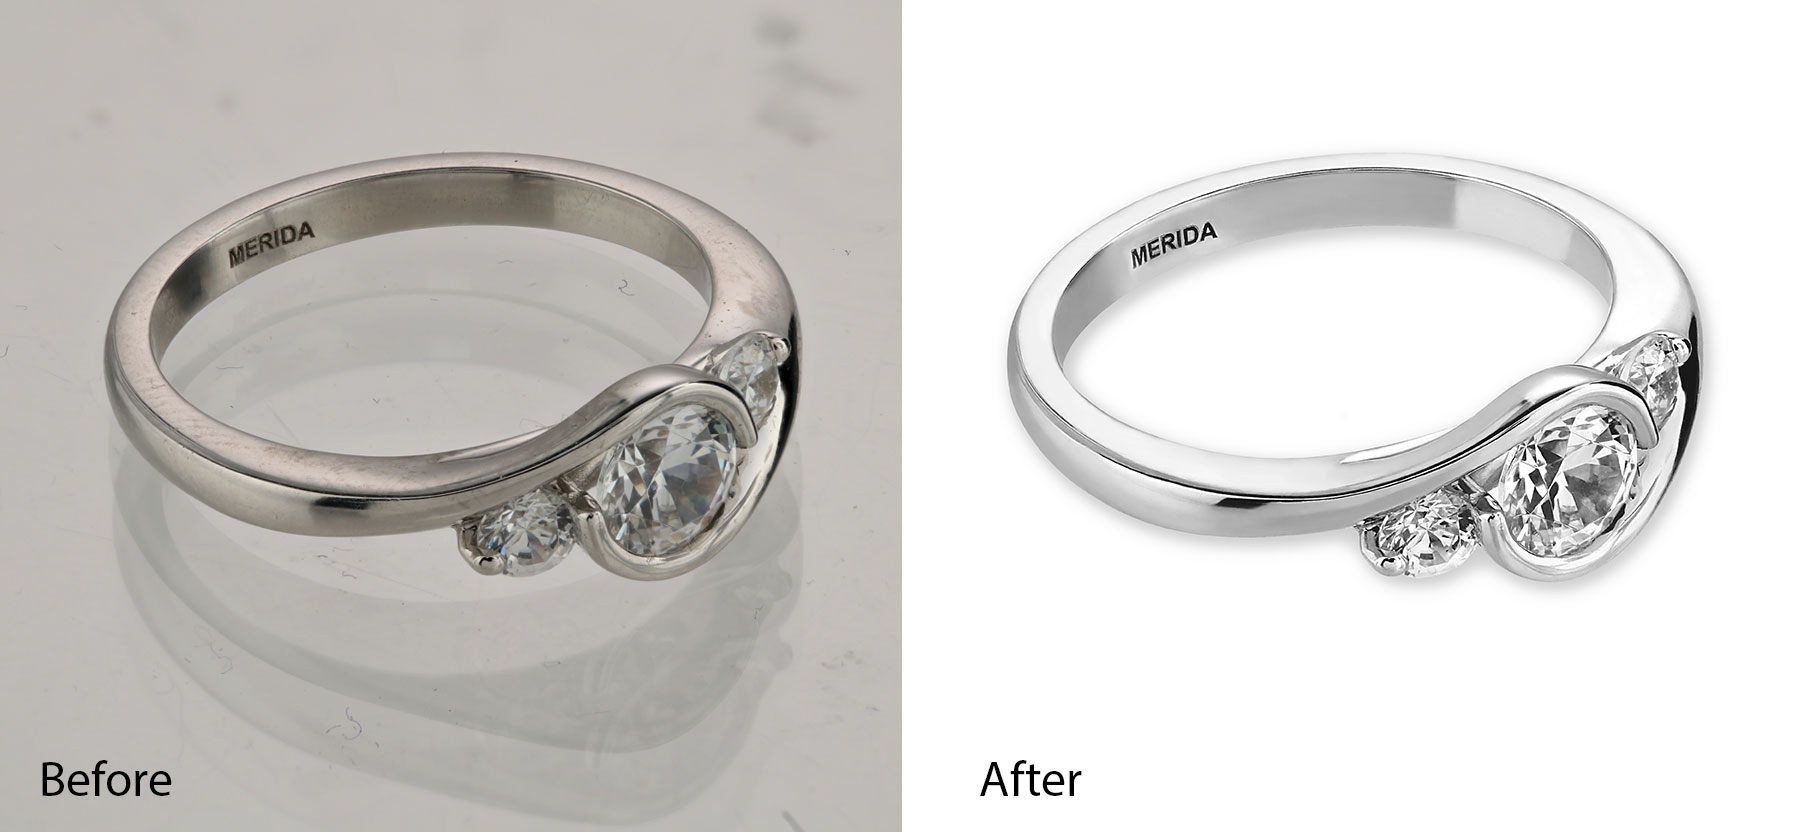

In [2]:
!wget https://tecpixel.com/wp-content/uploads/2018/10/banner001.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

In [4]:
import sys
if '../PaddleOCR/' not in sys.path: sys.path.append('../PaddleOCR/')
from tools.infer.utility import draw_ocr


In [5]:
from paddleocr import PaddleOCR

ocr = PaddleOCR(lang='en') # need to run only once to download and load model into memory
img_path = './input.jpg'
result = ocr.ocr(img_path)
for line in result:
    print(line)


/usr/local/share/anaconda3/envs/paddlepaddle/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Namespace(cls=False, cls_batch_num=30, cls_image_shape='3, 48, 192', cls_model_dir='/home/ubuntu/.paddleocr/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=2.0, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_max_side_len=960, det_model_dir='/home/ubuntu/.paddleocr/det', enable_mkldnn=False, gpu_mem=8000, image_dir=None, ir_optim=True, label_list=['0', '180'], lang='en', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=30, rec_char_dict_path='./ppocr/utils/ic15_dict.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='/home/ubuntu/.paddleocr/rec/en', use_angle_cls=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)
dt_boxes num : 4, elapse : 6.145689487457275
rec_res num  : 4, elapse : 0.02537369728088379
[[[219.0, 238.0], [313.0, 204.0], [324.0, 242.0], [232.0, 276.0]], ['MERIDA', 0.99968314]]
[[

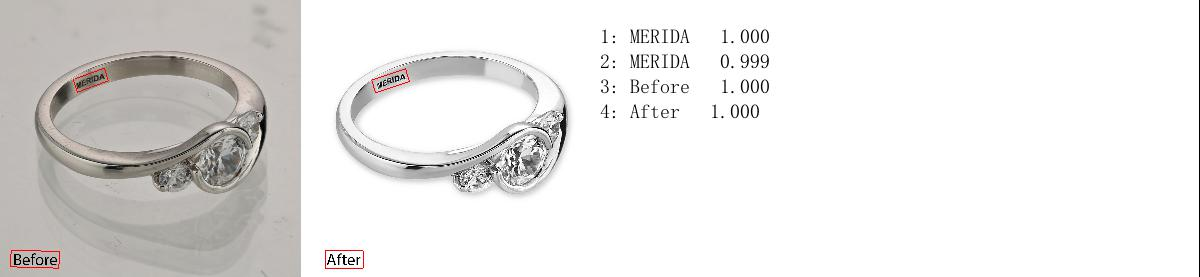

In [9]:
# draw result
from PIL import Image
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='doc/simfang.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')
im = cv2.imread("result.jpg")
cv2_imshow(im)